<a href="https://colab.research.google.com/github/Faisalabdulmajid/colabolatory/blob/main/cnn_klasifikasi_burung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1sFtWvOFwLecbrVabGzNZBKEGeelGw9rA

Downloading...
From (original): https://drive.google.com/uc?id=1sFtWvOFwLecbrVabGzNZBKEGeelGw9rA
From (redirected): https://drive.google.com/uc?id=1sFtWvOFwLecbrVabGzNZBKEGeelGw9rA&confirm=t&uuid=6fb69452-7425-4030-96e8-746cdccc7d5c
To: /content/data_burung.zip
100% 61.0M/61.0M [00:01<00:00, 44.6MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("data_burung.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "data_burung/data",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
split_dir_to_train_test_val(directory="data_burung/data/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder LITTLE AUK. Train data copied. 3 files
Folder LITTLE AUK. Test data copied. 1 files
Folder LITTLE AUK. Validation data copied. 1 files
Folder GREATER PRAIRIE CHICKEN. Train data copied. 3 files
Folder GREATER PRAIRIE CHICKEN. Test data copied. 1 files
Folder GREATER PRAIRIE CHICKEN. Validation data copied. 1 files
Folder AMERICAN FLAMINGO. Train data copied. 3 files
Folder AMERICAN FLAMINGO. Test data copied. 1 files
Folder AMERICAN FLAMINGO. Validation data copied. 1 files
Folder YELLOW BELLIED FLOWERPECKER. Train data copied. 3 files
Folder YELLOW BELLIED FLOWERPECKER. Test data copied. 1 files
Folder YELLOW BELLIED FLOWERPECKER. Validation data copied. 1 files
Folder PUFFIN. Train data copied. 3 files
Folder PUFFIN. Test data copied. 1 files
Folder PUFFIN. Validation data copied. 1 files
Folder IBERIAN MAGPIE. Train data copied. 3 files
Folder IBERIAN MAGPIE. Test data copied. 1 files
Folder IBERIAN MAGPIE. Validation data copied. 1 files
Folder RED BILLED TROPICBIRD. Train d

In [ ]:
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL',
       'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO',
       'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER',
       'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS',
       'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH',
       'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN',
       'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO',
       'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT',
       'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON',
       'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING',
       'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD',
       'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD',
       'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD',
       'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD',
       'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ',
       'AUSTRAL CANASTERO', 

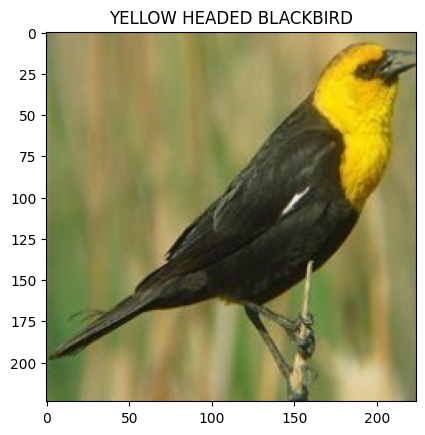

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "YELLOW HEADED BLACKBIRD")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

# BATCH_SIZE = 32
# IMG_SIZE = (224, 224)

# train_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/train",
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)

# validation_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/validation",
#                                                                  shuffle=True,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE)

# test_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/test",
#                                                            shuffle=True,
#                                                            batch_size=BATCH_SIZE,
#                                                            image_size=IMG_SIZE)

# batch_size = 32
# img_height = 240
# img_width = 240

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/train",
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/validation",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/test",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

Found 1575 images belonging to 525 classes.
Found 525 images belonging to 525 classes.
Found 525 images belonging to 525 classes.


In [ ]:
import numpy as np

# class_names = np.array(train_dataset.class_names)
# print(class_names)

In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# train_ds = train_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
# val_ds = validation_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input

base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Dropout(rate=0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(525, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          589856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_1 (Dense)             (None, 525)               151725    
                                                      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'files/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_data = validation_datagen.flow_from_directory(
    'files/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(train_data,
                     batch_size=32,
                     epochs=50,
                     steps_per_epoch=len(train_data),
                     validation_data=validation_data)

Found 525 images belonging to 525 classes.
Found 525 images belonging to 525 classes.
Epoch 1/50
17/17 [==============================] - 280s 17s/step - loss: 6.4598 - accuracy: 0.0000e+00 - val_loss: 6.2639 - val_accuracy: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 271s 17s/step - loss: 6.2642 - accuracy: 0.0019 - val_loss: 6.2635 - val_accuracy: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 247s 15s/step - loss: 6.2578 - accuracy: 0.0038 - val_loss: 6.2594 - val_accuracy: 0.0057
Epoch 4/50
17/17 [==============================] - 278s 17s/step - loss: 6.2406 - accuracy: 0.0057 - val_loss: 6.2655 - val_accuracy: 0.0019
Epoch 5/50
17/17 [==============================] - 246s 15s/step - loss: 6.2522 - accuracy: 0.0057 - val_loss: 6.2385 - val_accuracy: 0.0076
Epoch 6/50
17/17 [==============================] - 252s 15s/step - loss: 6.2202 - accuracy: 0.0038 - val_loss: 6.2241 - val_accuracy: 0.0133
Epoch 7/50
17/17 [==============================] 

In [ ]:
model.evaluate(test_data)

17/17 [==============================] - 118s 7s/step - loss: 0.2348 - accuracy: 0.9714


[0.23481079936027527, 0.9714285731315613]

<Axes: >

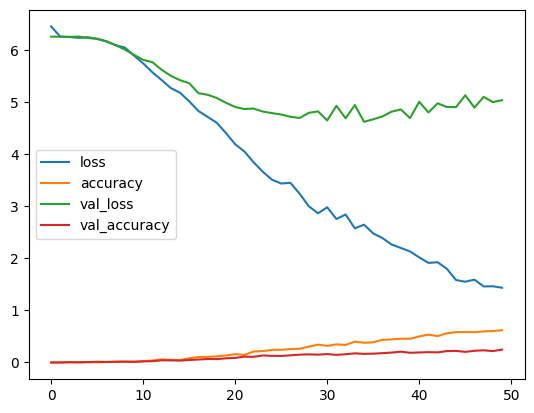

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("files/train/ALEXANDRINE PARAKEET/3.jpg", 224)

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 2s 2s/step


array([[3.92452307e-07, 4.88950775e-07, 4.44086763e-04, 1.73934404e-05,
        5.89328738e-06, 5.08170660e-06, 4.13622807e-08, 1.24919952e-05,
        5.69452880e-07, 9.77162129e-10, 1.02445812e-08, 6.89613402e-01,
        8.22477659e-07, 1.85245526e-08, 4.44252954e-08, 7.72477549e-09,
        6.55282193e-08, 1.43854457e-08, 1.18309394e-07, 2.12255557e-07,
        7.82882736e-09, 2.88848168e-09, 1.47710762e-06, 1.50269136e-06,
        2.94159497e-09, 4.21988574e-07, 1.41568904e-07, 2.83763967e-07,
        6.79123275e-07, 1.09843413e-07, 6.44186002e-08, 5.71385790e-05,
        2.45419119e-06, 3.25537228e-04, 6.57506902e-08, 4.38255618e-08,
        6.05340631e-07, 7.96419317e-06, 9.84569795e-08, 2.52376867e-06,
        7.25543476e-04, 7.31432283e-06, 5.79915377e-06, 7.39053334e-08,
        1.32947982e-08, 5.87080329e-10, 6.42363466e-06, 9.20522680e-09,
        1.93416412e-08, 3.13177792e-04, 1.25562004e-03, 1.42713407e-05,
        1.59132476e-08, 4.13729926e-04, 9.79182346e-07, 7.970606

In [ ]:
class_names[pred[0].argmax()]

'ALEXANDRINE PARAKEET'

In [ ]:
model.save("model.h5")